In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import ca_hospitals_data

plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
data = ca_hospitals_data.get_county("San Francisco")

INFO:root:Got 50 results out of 113 ...
INFO:root:Got 100 results out of 113 ...
INFO:root:Got 113 results out of 113 ...
INFO:root:Collected all pages


In [3]:
# Print out the notes about each field
notes = data.get("meta_from_source")

for note in notes:
    if note.get("id") == "_id" or note.get("id") == "rank":
        continue
    else:
        print(note.get("id"))
        print("==============")
        print(note.get("info").get("notes") + "\n")

county
The County where the hospital is located. None of the consolidated reporters had hospitals in different counties.

todays_date
Report date

hospitalized_covid_confirmed_patients
The number of patients hospitalized in an inpatient bed who have laboratory-confirmed COVID. This is not a cumulative number. This includes all inpatients (including those in ICUs and Medical/Surgical units), and does not include patients in affiliated clinics, outpatient departments, emergency departments and overflow locations awaiting an inpatient bed. As of April 21, 2020, COVID ED patients were removed from the Hospitalized COVID count and counted separately, see “ED/Overflow COVID Patients.”

hospitalized_suspected_covid_patients
The number of patients hospitalized in an inpatient bed without a laboratory-confirmed COVID diagnosis who, in accordance with CDC’s Interim Public Health Guidance for Evaluating Persons Under Investigation (PUIs), have signs and symptoms compatible with COVID (most patien

In [4]:
df = pd.DataFrame(data.get("series"))

In [5]:
df.head()

,_id,all_hospital_beds,county,hospitalized_covid_confirmed_patients,hospitalized_covid_patients,hospitalized_suspected_covid_patients,icu_available_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,rank,todays_date
0,88,NaN,San Francisco,58.0,NaN,92.0,90.0,18.0,7.0,0.090167,2020-03-30T00:00:00
1,134,NaN,San Francisco,67.0,NaN,69.0,77.0,30.0,14.0,0.090167,2020-03-31T00:00:00
2,205,NaN,San Francisco,67.0,NaN,66.0,64.0,30.0,8.0,0.090167,2020-04-01T00:00:00
3,234,NaN,San Francisco,75.0,NaN,60.0,58.0,32.0,11.0,0.090167,2020-04-02T00:00:00
4,296,NaN,San Francisco,80.0,NaN,71.0,74.0,39.0,8.0,0.090167,2020-04-03T00:00:00


In [6]:
# Convert the date values to datetime type
df["todays_date"] = pd.to_datetime(
    df["todays_date"], infer_datetime_format=True
)

# Sort and set the date as the index
df = df.sort_values("todays_date").set_index("todays_date")
             
df.head()

,_id,all_hospital_beds,county,hospitalized_covid_confirmed_patients,hospitalized_covid_patients,hospitalized_suspected_covid_patients,icu_available_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,rank
todays_date,,,,,,,,,,
2020-03-29,49,NaN,San Francisco,50.0,NaN,73.0,61.0,24.0,10.0,0.090167
2020-03-30,88,NaN,San Francisco,58.0,NaN,92.0,90.0,18.0,7.0,0.090167
2020-03-31,134,NaN,San Francisco,67.0,NaN,69.0,77.0,30.0,14.0,0.090167
2020-04-01,205,NaN,San Francisco,67.0,NaN,66.0,64.0,30.0,8.0,0.090167
2020-04-02,234,NaN,San Francisco,75.0,NaN,60.0,58.0,32.0,11.0,0.090167


In [7]:
icu = df[['icu_covid_confirmed_patients']]
icu.head(10)

,icu_covid_confirmed_patients
todays_date,
2020-03-29,24.0
2020-03-30,18.0
2020-03-31,30.0
2020-04-01,30.0
2020-04-02,32.0
2020-04-03,39.0
2020-04-04,37.0
2020-04-05,37.0
2020-04-06,34.0


In [8]:
icu.rolling('7D').mean().head(10)

,icu_covid_confirmed_patients
todays_date,
2020-03-29,24.000000
2020-03-30,21.000000
2020-03-31,24.000000
2020-04-01,25.500000
2020-04-02,26.800000
2020-04-03,28.833333
2020-04-04,30.000000
2020-04-05,31.857143
2020-04-06,34.142857


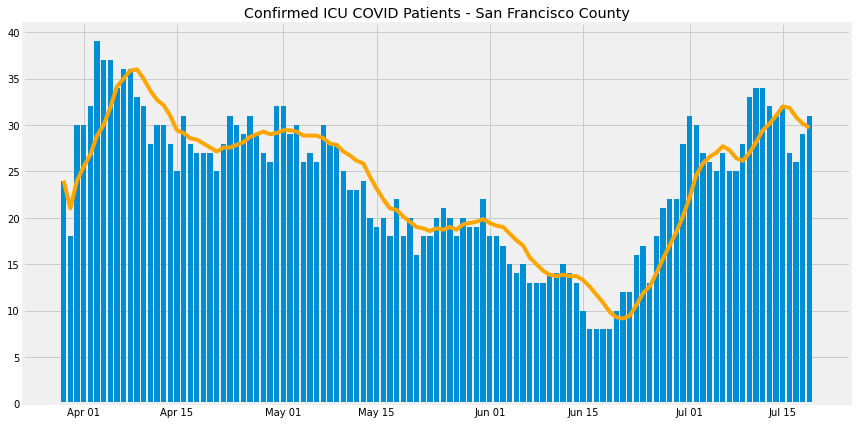

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.bar(x=icu.index, height=icu["icu_covid_confirmed_patients"])
plt.plot(icu.rolling('7D').mean(), color='orange')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_title("Confirmed ICU COVID Patients - San Francisco County")
plt.tight_layout()

In [10]:
fig.savefig("icu_covid_chart.png")